In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import utils as utils

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from ml_models import Disease_Prediction

In [3]:
from IPython.display import clear_output
clear_output(wait=True)

In [5]:
df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)

In [6]:
utils.bmi(df)

id
0        22.0
1        35.0
2        24.0
3        29.0
4        23.0
         ... 
99993    27.0
99995    50.0
99996    31.0
99998    27.0
99999    25.0
Name: bmi, Length: 70000, dtype: float64

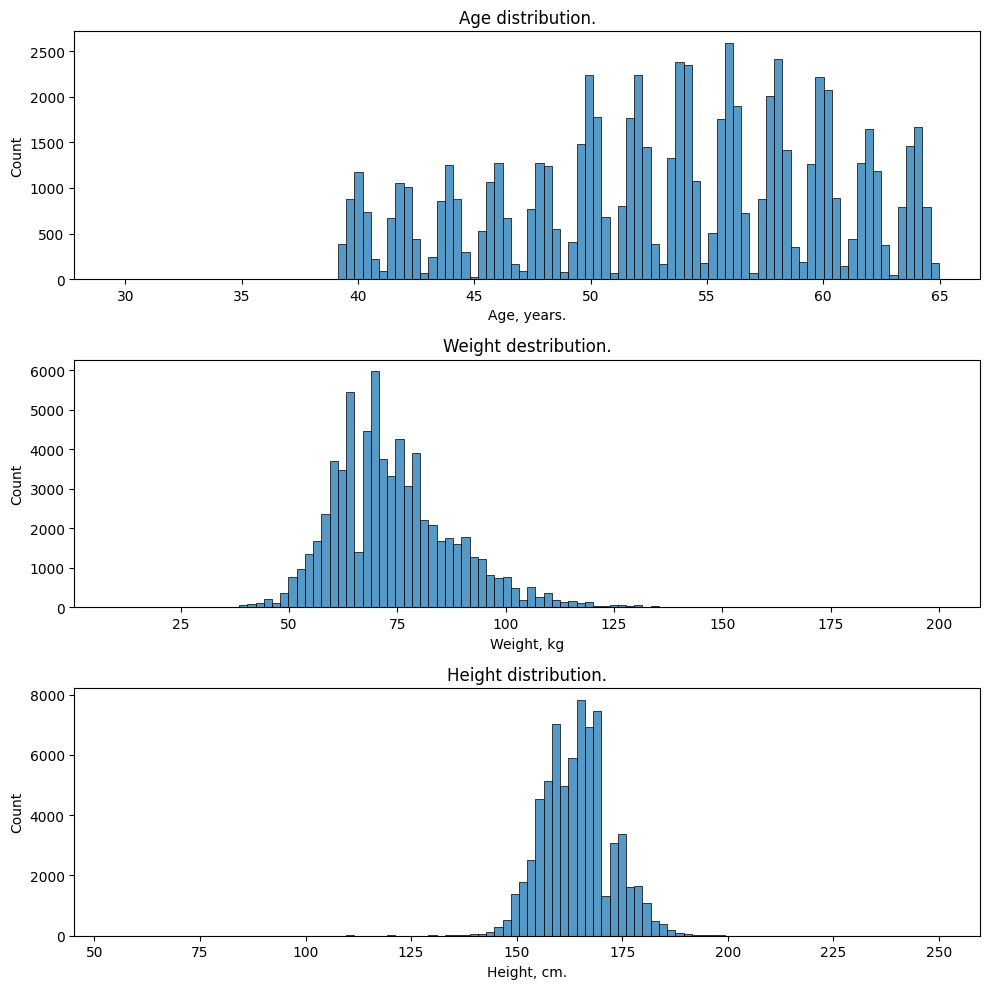

In [7]:
utils.eda_histplot(df);

In [7]:
# outliers bmi
Q1, Q3 = np.quantile(df['bmi'], 0.25), np.quantile(df['bmi'], 0.75)
IQR = Q3 - Q1
threshold = 3
df = df[(df['bmi'] >= Q1 - threshold * IQR) & ( df['bmi'] <= Q3 + threshold * IQR)]

In [ ]:
utils.bmi_cat(df)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal range
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,Obese (class 1)
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,Normal range
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,Over-weight
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.0,Over-weight
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,27.0,Over-weight
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.0,Obese (class 1)


In [9]:
### ?????????????????

df = df[df['bmi'] >= 12]

In [10]:
# outliers ap_hi
Q1, Q3 = np.quantile(df['ap_hi'], 0.25), np.quantile(df['ap_hi'], 0.75)
IQR = Q3 - Q1
threshold = 1.5
df = df[(df['ap_hi'] >= Q1 - threshold * IQR) & ( df['ap_hi'] <= Q3 + threshold * IQR)]

In [11]:
# outliers ap_lo
Q1, Q3 = np.quantile(df['ap_lo'], 0.25), np.quantile(df['ap_lo'], 0.75)
IQR = Q3 - Q1
threshold = 1.5
df = df[(df['ap_lo'] >= Q1 - threshold * IQR) & ( df['ap_lo'] <= Q3 + threshold * IQR)]

In [12]:
df = df.dropna()

In [ ]:
utils.pressure_cat(df)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat,pressure_cat
id,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal range,Healthy
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,Obese (class 1),Stage 2 hypertension
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,Normal range,Stage 1 hypertension
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,Over-weight,Stage 2 hypertension
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.0,Over-weight,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,24.0,Normal range,Stage 1 hypertension
99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.0,Over-weight,Stage 2 hypertension
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,27.0,Over-weight,Healthy


In [14]:
df_new = df.copy()

In [15]:
df_new_01 = df_new.drop(columns=['ap_hi', 'ap_lo', 'height', 'weight', 'bmi'])
df_new_01 = pd.get_dummies(df_new_01, columns = ["bmi_cat", 'pressure_cat',  "gender"], drop_first=True)

In [16]:
df_new_02 = df_new.drop(columns=['bmi_cat', 'pressure_cat', 'height', 'weight'])
df_new_02 = pd.get_dummies(df_new_02, columns = ["gender"], drop_first=True)
df_new_02.head()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_2
id,,,,,,,,,,,
0,18393,110,80,1,1,0,0,1,0,22.0,True
1,20228,140,90,3,1,0,0,1,1,35.0,False
2,18857,130,70,3,1,0,0,0,1,24.0,False
3,17623,150,100,1,1,0,0,1,1,29.0,True
8,21914,120,80,2,2,0,0,0,0,29.0,False


## DF_NEW_01
---

#### Logistic regression.
---

In [17]:
model = Disease_Prediction(df_new_01, 'cardio')

#model.voting_clf()

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      4791
           1       0.71      0.67      0.69      4764

    accuracy                           0.70      9555
   macro avg       0.70      0.70      0.70      9555
weighted avg       0.70      0.70      0.70      9555

KNeighborgs Best Recall:: 0.693016400808807
Recall: 0.6882683892477599
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      4756
           1       0.71      0.69      0.70      4799

    accuracy                           0.71      9555
   macro avg       0.71      0.71      0.71      9555
weighted avg       0.71      0.71      0.71      9555



array([0, 1, 0, ..., 0, 0, 0], shape=(9555,))

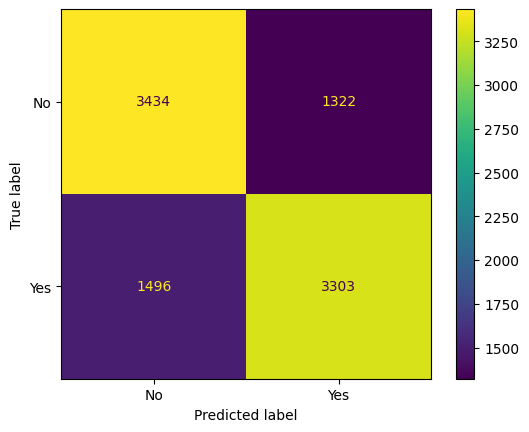

In [18]:
model.test(model.knn())

In [19]:
#model.log_reg()

### KNN
---

In [20]:
#model.knn()

### Random Forest.
---

In [21]:
#model.random_forest()

## DF_NEW_02
---

### Logistic regression.
---

In [22]:
#model = Disease_Prediction(df_new_02, 'cardio')
#model.log_reg()
#model.voting_clf()

### KNN.
---

In [23]:
#model.knn()

### Random Forest.
---

In [24]:
#model.random_forest()